Los objetivos de hoy son:
    
    1. Buscar un conjunto de datos a analizar:
        
         - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, 
           primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a 
           la hora de realizar predicciones en las clases de regresión lineal múltiple. 
           Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.
        
         - Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
           Esto se hace para que comprendais mejor los datos con los que estais trabajando.
           Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../DA-PROMO-B-MODULO3-SPRINT1-LUCIA_NATALIA/Datos/possum.csv", index_col=0)

Elegimos este Dataframe por tener variables numéricas diferentes y alguna categórica como pide el enunciado

In [19]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


Vemos las etiquetas de nuestras columnas

In [20]:
df.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Vemos el numero de filas y columnas de nuestro Dataframe

In [21]:
print(f'El número de filas es: {df.shape[0]} y el número de columnas es: {df.shape[1]}')

El número de filas es: 104 y el número de columnas es: 13


Vemos qué porcentaje de nulos contiene nuestro Dataframe

In [22]:
nulos =pd.DataFrame(df.isnull().sum()*100/df.shape[0])

In [23]:
nulos.rename(columns={0:'% nulos'}, inplace=True)
nulos

,% nulos
site,0.000000
Pop,0.000000
sex,0.000000
age,1.923077
hdlngth,0.000000
skullw,0.000000
totlngth,0.000000
taill,0.000000
footlgth,0.961538
earconch,0.000000


Vemos que tipo de datos contiene nuestro Dataframe

In [24]:
df.dtypes

site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

Extraemos la info general del Dataframe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


Analizamos los principales estadísticos de nuestro Dataframe

In [26]:
df.describe(include='all')

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


 Realizar un EDA sencillo para la variable dependiente y la variable independiente.
 Hipotesis No Nula: La variable respuesta/dependiente (en este caso escogemos la edad) y la variable independiente/predictora (el tamaño de las orejas, tamaño del cráneo, etc es la que estaos analizando qué correlación hay)

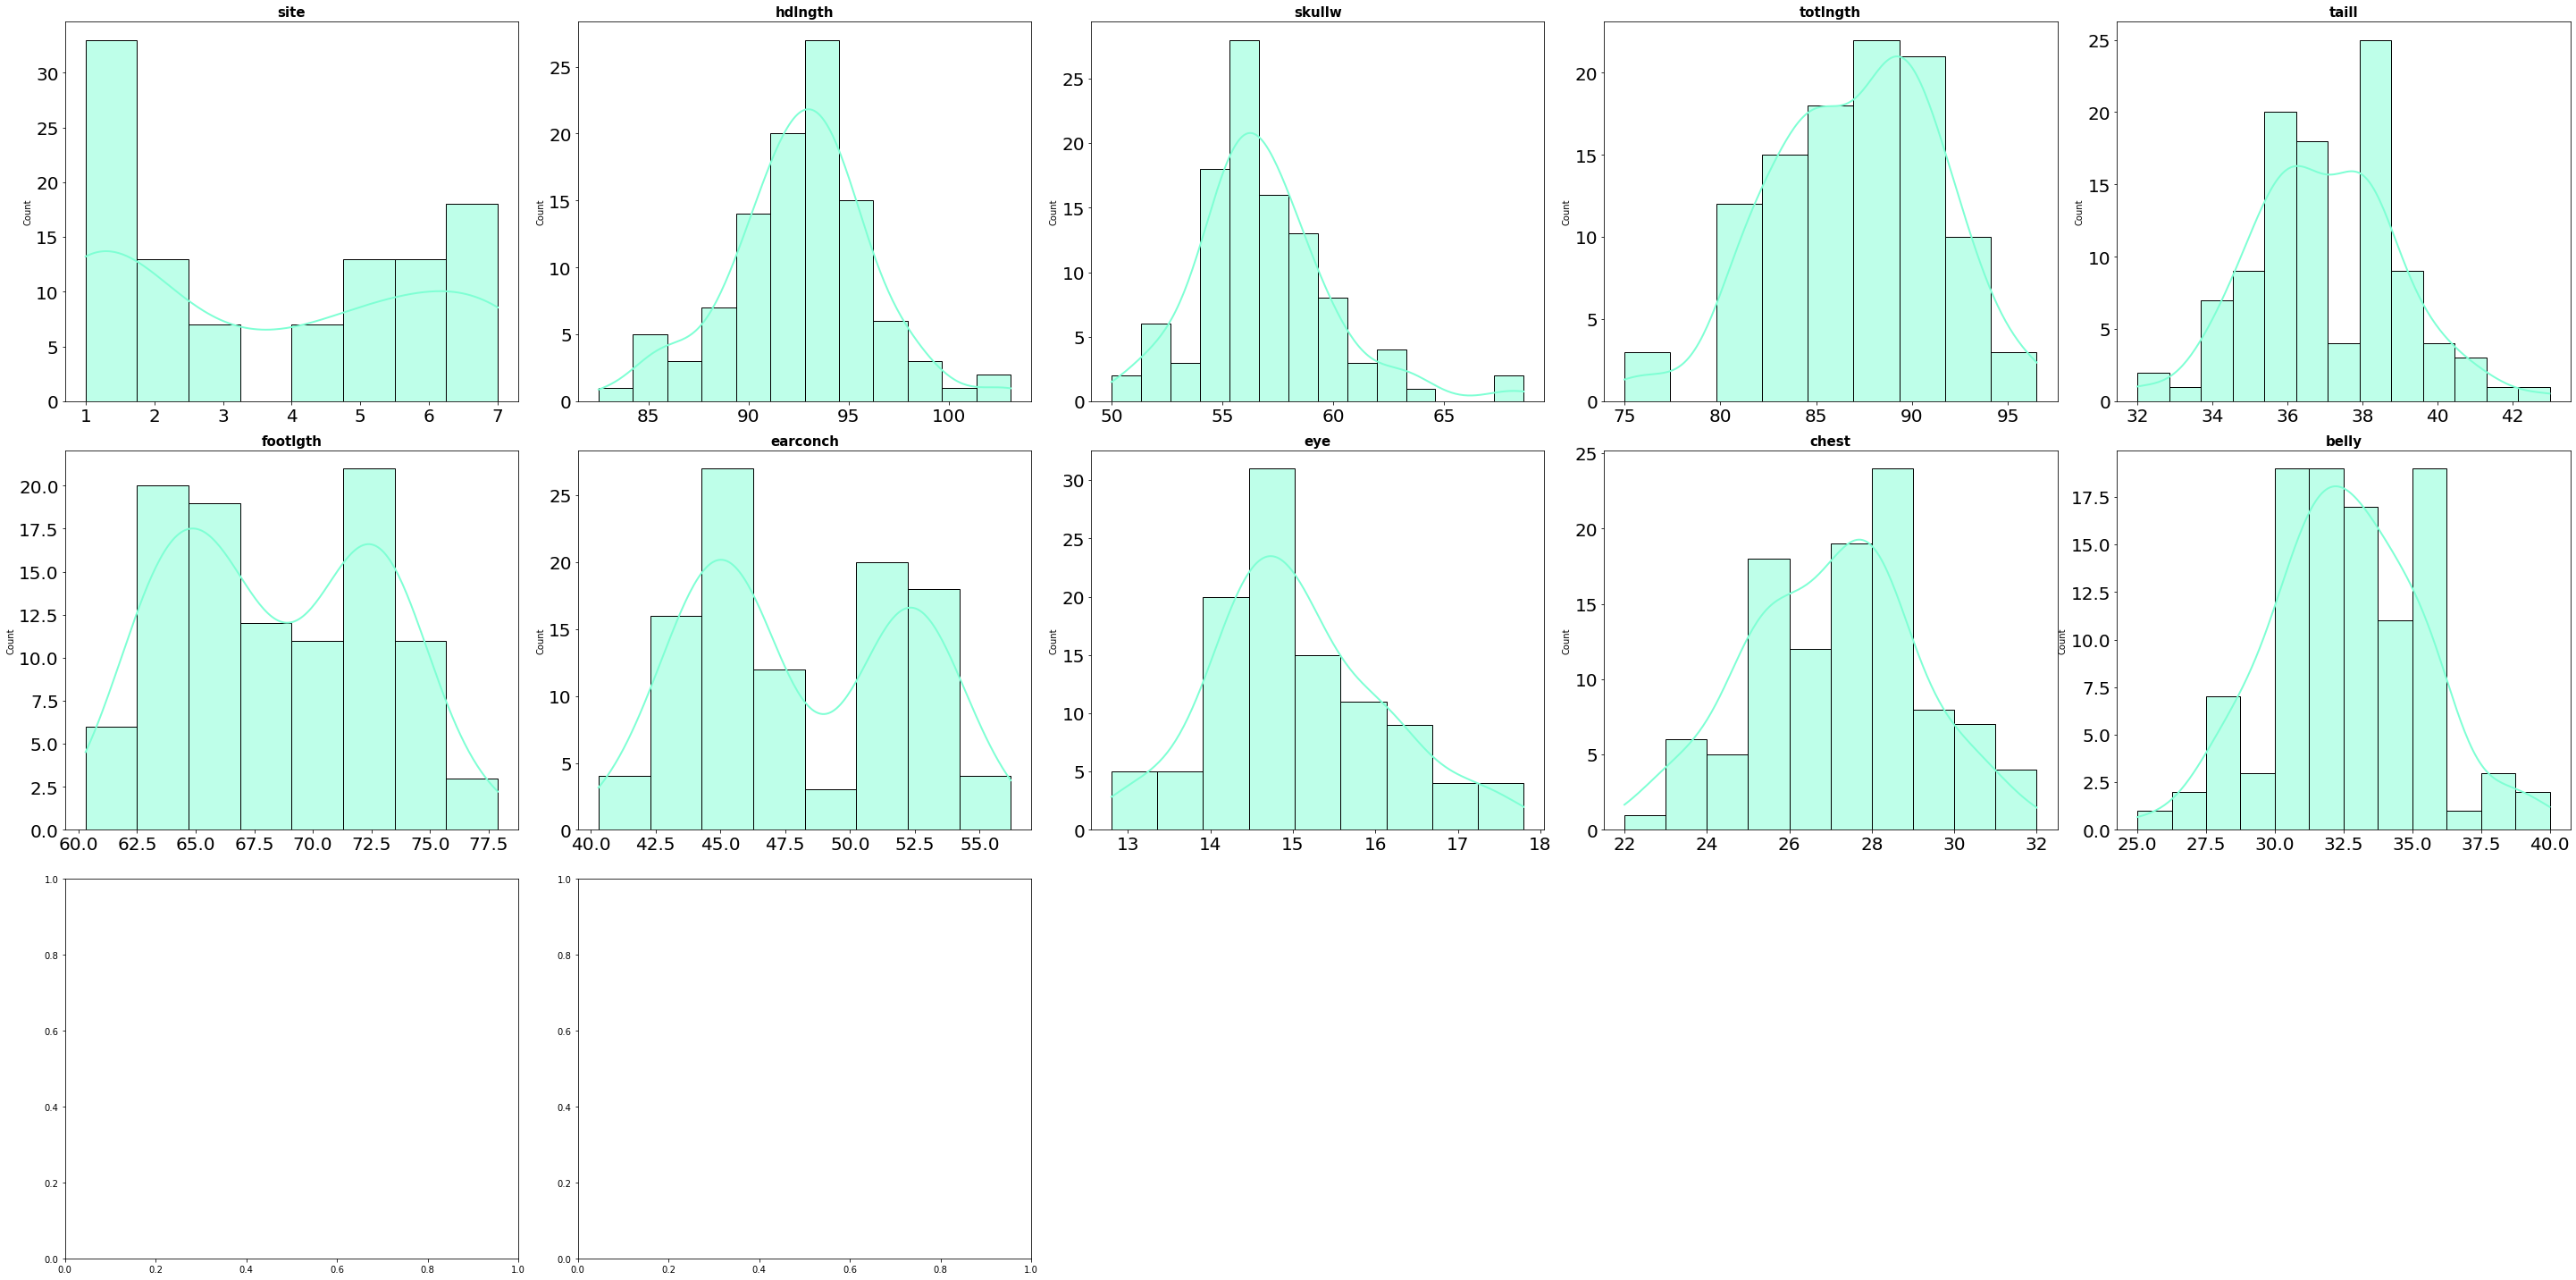

In [34]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (40, 20))


axes = axes.flat

numerics = ["float64", "int64"]

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("age")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

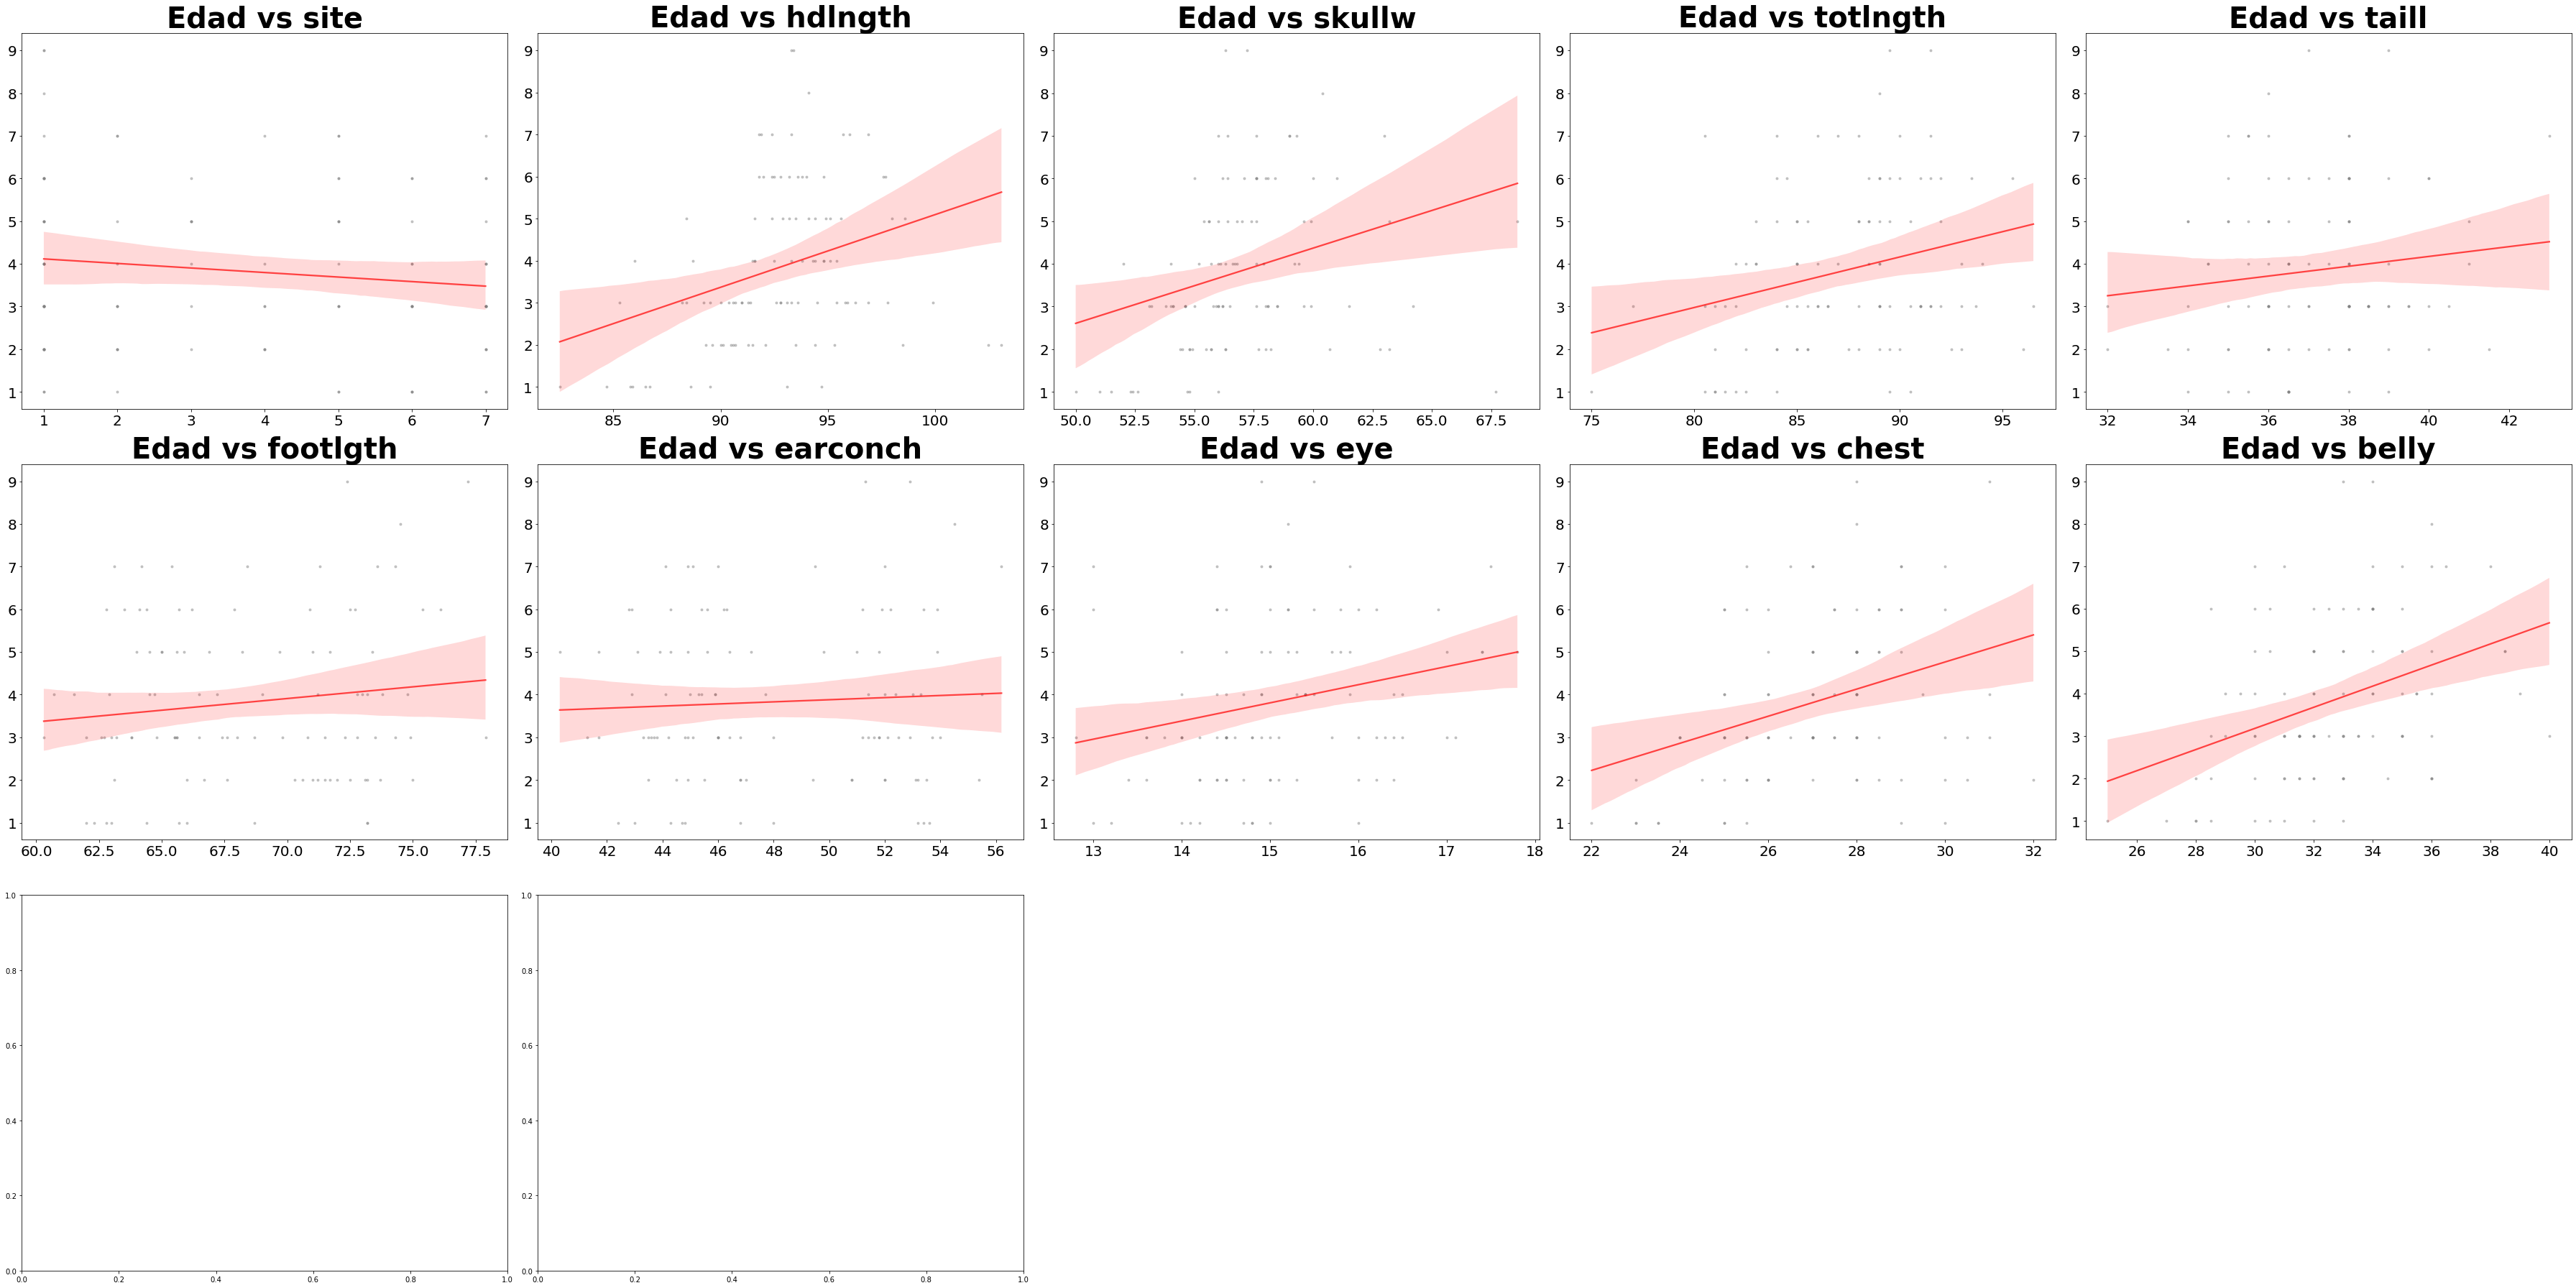

In [42]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (50, 25))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("age")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["age"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Edad vs {colum}", fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

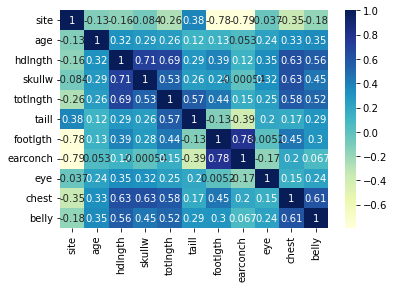

In [40]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

/tmp/ipykernel_11593/3757257610.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


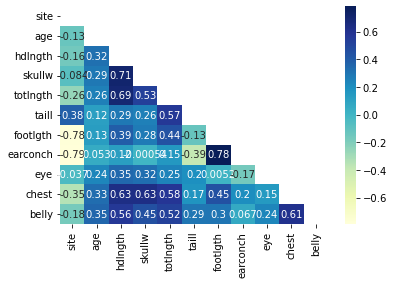

In [43]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Analizamos al roedor y mamífero Possum (Zarigüeya) a través de nuestro Dataset y llegamos a las siguientes conclusiones:

 - Entre 0.10 y 0.29: Hay una correlación débil entre la edad y la cola, el largo de las patas,los ojos, el largo de los dientes, el cráneo.


- Entre 0.30 y 0.60: Hay correlación moderada entre la edad y la longitud de la cabeza, el torso y el abdomen.


- Entre 0.60 y 1: Sin embargo no podemos establecer que haya un correlación fuerte entre otras variables